# Week 3 - Lab 1 Data Preprocessing-I

# Check Data

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('movie1.csv')
df.head()

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
0,Horror,125,5.0,3968,74.348337,31.356476,2020
1,Romance,84,9.8,8150,28.243154,212.016126,2013
2,SciFi,75,2.0,1040,164.601429,129.342033,2017
3,Action,68,7.9,6250,38.779734,424.519154,2019
4,Thriller,6,4.7,8356,102.752477,16.652313,2012


In [96]:
# Mean, Median, Mode/Frequent Category
df.describe()

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
count,101.000000,101.000000,101.000000,101.000000,96.000000
mean,53.554455,5.562376,5272.663366,5456.333862,239.422768
std,33.764323,2.608864,2891.578546,25371.661518,156.248835
min,0.000000,1.100000,437.000000,3.274064,6.018111
25%,26.000000,3.300000,2711.000000,48.764034,118.330717
50%,52.000000,5.400000,5410.000000,92.511321,208.085811
75%,77.000000,7.700000,7734.000000,155.704105,379.441128
max,142.000000,9.900000,9882.000000,160159.381000,497.200395


In [97]:
# Check for missing variables
missing_data=df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     5
Year of Release     0
dtype: int64


In [98]:
# Check data types **
data_types=df.dtypes
print(data_types)

Genre                object
Rotten Tomatoes       int64
IMDB                float64
Audience Ratings      int64
Budget_M            float64
Sales Revenue_M     float64
Year of Release      object
dtype: object


In [99]:
year_num={'Year 2004':2004,
          'Year 2008':2008,
          'Year 2023':2023,
          'Year 1982':1982,
          'Year 2001':2001}

df['Year of Release']=df['Year of Release'].replace(year_num)
df['Year of Release']=pd.to_numeric(df['Year of Release'])

In [100]:
data_types=df.dtypes
print(data_types)

Genre                object
Rotten Tomatoes       int64
IMDB                float64
Audience Ratings      int64
Budget_M            float64
Sales Revenue_M     float64
Year of Release       int64
dtype: object


In [101]:
# Check for duplication
duplicates=df.duplicated().sum()
print("Number of Duplicate Records: ", duplicates)

Number of Duplicate Records:  1


In [102]:
df=df.drop_duplicates()

In [103]:
duplicates=df.duplicated().sum()
print("Number of Duplicate Records: ", duplicates)

Number of Duplicate Records:  0


In [104]:
df["Genre"].unique()
# ** Two Sci-Fi

array(['Horror', 'Romance', 'SciFi', 'Action', 'Thriller', 'Comedy',
       'Sci-Fi', 'Drama', 'Documentary'], dtype=object)

In [105]:
df["Genre"]=df["Genre"].replace({'SciFi':'Sci-Fi'})

In [106]:
df['Genre'].unique()

array(['Horror', 'Romance', 'Sci-Fi', 'Action', 'Thriller', 'Comedy',
       'Drama', 'Documentary'], dtype=object)

In [107]:
# Check for invalid entries
df = df[df["Rotten Tomatoes"] <100]

In [108]:
df.describe()

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
count,94.00000,94.000000,94.000000,94.000000,89.000000,94.000000
mean,49.06383,5.523404,5284.414894,5855.070637,248.757629,2002.031915
std,29.66110,2.647353,2881.563496,26265.079627,155.999116,12.928631
min,0.00000,1.100000,437.000000,3.274064,7.803032,1980.000000
25%,23.25000,3.225000,2842.750000,49.030044,123.031593,1991.250000
50%,48.50000,5.350000,5450.500000,97.502337,212.016126,2002.500000
75%,72.75000,7.700000,7726.500000,155.536933,407.483240,2013.000000
max,99.00000,9.900000,9882.000000,160159.381000,497.200395,2023.000000


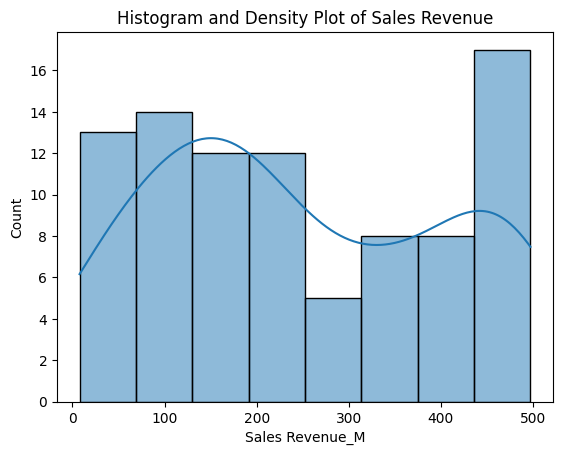

In [109]:
sns.histplot(df["Sales Revenue_M"], kde=True)
plt.title(f"Histogram and Density Plot of Sales Revenue")
plt.show()

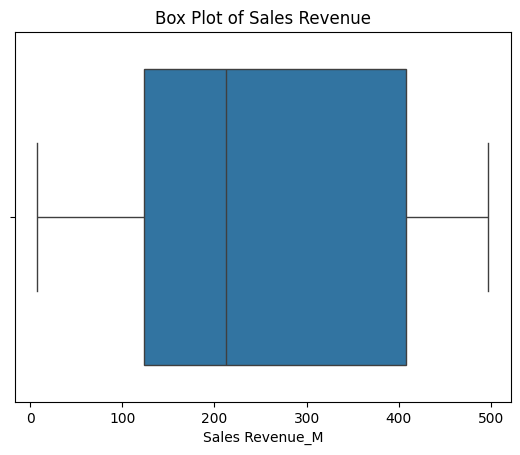

In [110]:
sns.boxplot(x=df["Sales Revenue_M"])
plt.title(f"Box Plot of Sales Revenue")
plt.show()

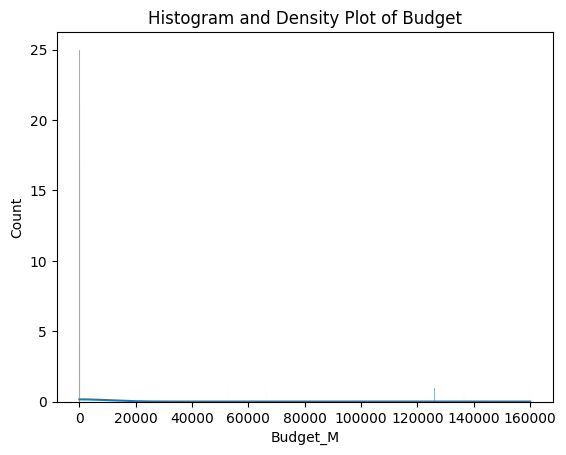

In [111]:
sns.histplot(df["Budget_M"], kde=True)
plt.title(f"Histogram and Density Plot of Budget")
plt.show()

## 1. Imputation Techniques Comparison
Initial visualizations, checking data types, and identifying any errors or inconsistencies in your dataset.

Missing 5 values from Sales Revenue_M
+ There's little skewness to the right
+ Here we can ***Impute the median for the missing values***
+ This would narrow our range, make distribution more normal

In [112]:
median = df['Sales Revenue_M'].fillna(df['Sales Revenue_M'].median(),inplace=True)

In [113]:
missing_data=df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     0
Year of Release     0
dtype: int64


## 4. Outlier Identification and Handling

So, we used the 1.5*IQR method to find the outliers (there are 5 of them). We decided to remove them.

In [114]:
df['Budget_M'].describe()

count        94.000000
mean       5855.070637
std       26265.079627
min           3.274064
25%          49.030044
50%          97.502337
75%         155.536933
max      160159.381000
Name: Budget_M, dtype: float64

In [115]:
IQR = 155.536933 - 3.274064
IQR1 = IQR*1.5

In [116]:
Q1_Outlier = 49.03004 - IQR1

In [117]:
Q3_Outlier = 155.536933 + IQR1

In [118]:
df.loc[df['Budget_M']>Q3_Outlier,'Budget_M']

46     52625.09030
54    160159.38100
65    136597.10960
81     66216.35991
98    126150.78940
Name: Budget_M, dtype: float64

In [119]:
df.loc[df['Budget_M']>Q3_Outlier,'Budget_M'] = None

In [120]:
df.loc[df['Budget_M']>Q3_Outlier,'Budget_M']

Series([], Name: Budget_M, dtype: float64)

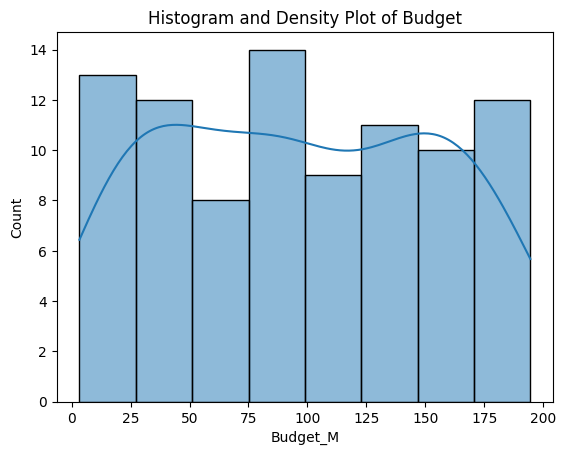

In [121]:
sns.histplot(df["Budget_M"], kde=True)
plt.title(f"Histogram and Density Plot of Budget")
plt.show()

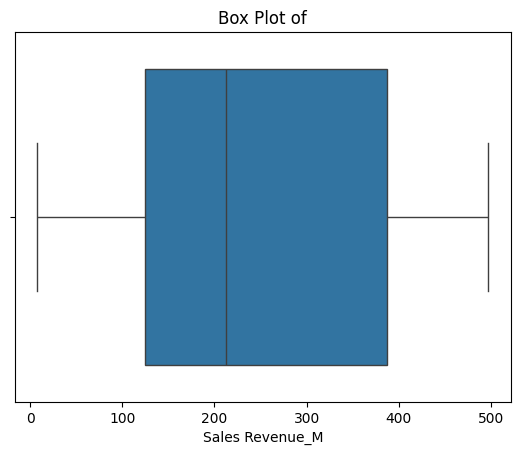

In [122]:
sns.boxplot(x=df["Sales Revenue_M"])
plt.title(f"Box Plot of")
plt.show()

## 5. Handling Missing Values

We also had missing data in #1, and we replaced it with the median. Other strategies we could've done are:
+ Remove it completely (if the data is irrelevent/invalid)
+ Impute with the mean (if the data was normal)
+ Impute with the median (like we did in #1, since the data was skewed to the right)
+ Impute the mode (if the data is categorical, if there's a category that is **dominant**)